<a href="https://colab.research.google.com/github/Venni2911/LogicMojo-AI-ML-Sept25-VenniRaj/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machines (SVM)

**Agenda**

- Introduction to SVM
  - History Behing SVm
  - What is a Support Vector Machine (SVM)?
  - Logistic Regression v/s SVM
  - Types of SVM
  - Important Terms in SVM
    - Support Vector
    - Margin
  - How Does SVM work?
  - Maximum Margin Classifier
    - Decision Boundary
    - Maximize Margin Width
  - Advantages of SVM
  - Implementations of SVM
  - Cost Function in SVM
- Soft and Hard Margin
- Hinge Loss
- Kernelization in SVM
- Dual Form of Cost Function
- Use Case for Comparing Different Techniques


## Introduction to SVM

### History Behind SVM

- An innovative approach pioneered by Vladimir Vapnik, a Russian researcher, is introduced.
- Vapnik's work, initiated in 1960, remained relatively obscure until his migration to the US in 1991, where he shared his findings with colleagues.
- This approach challenges conventional **linear decision boundaries** by advocating for **wider boundaries** to optimize class separation.
- Vapnik's pioneering concept laid the groundwork for the development of Support Vector Machines (SVMs), also referred to as maximum margin classifiers.
- SVMs deviate from traditional linear models by aiming to identify decision boundaries that maximize class separation.
- This approach prioritizes maximizing the margin between upper and lower boundaries, thus enhancing classification accuracy.

### What is a Support Vector Machine (SVM)?

- Support Vector Machine (SVM) stands as a robust supervised algorithm renowned for its effectiveness on complex datasets, particularly those of smaller size. - Functioning adeptly in both regression and classification tasks, SVM's prowess shines brightest in classification challenges.

**Note: Assuming familiarity with Decision Trees, Random Forests, Naïve Bayes, K-nearest neighbor, and Ensemble Modelling techniques, We encourage further exploration of these methods if necessary.**

- SVM stands as a supervised machine learning technique aimed at identifying a hyperplane that optimally segregates two classes within a dataset.
- It's essential not to conflate SVM with logistic regression.
- While both algorithms seek to ascertain the optimal hyperplane, they diverge in their underlying methodologies.
- Logistic regression adopts a probabilistic approach, whereas SVM relies on statistical methods.









Now, the pivotal question arises: which hyperplane does SVM select? Given that numerous hyperplanes can perfectly classify two classes, the determination of the best one becomes imperative.

SVM accomplishes this by identifying the hyperplane with the maximum margin, which represents the maximum distance between the two classes.

We will discuss about this maximum margin in this lecture.

### Logistic Regression vs. Support Vector Machine (SVM)

- The choice between logistic regression and SVM hinges on the characteristics of the dataset, particularly the number of features.

- SVM excels when dealing with small yet complex datasets.
- It's often advisable to commence with logistic regression and evaluate its performance.
- If logistic regression fails to achieve satisfactory accuracy, SVM can be considered, particularly the variant without any kernel (more on kernels will be discussed later).
- Both logistic regression and SVM without kernels typically yield similar performance. However, the efficiency of one over the other may vary depending on the features of the dataset.

#### Logistic Regression Classification

- In logistic regression, observations are classified based on the equation =  W<sup>T</sup>⋅X + b.
- W<sup>T</sup>⋅X + b is much greater than 0, the prediction is y = 1.
- W<sup>T</sup>⋅X + b is much less than 0, the prediction is y = 0.

where,

- W<sup>T</sup> represents the weight vector, which contains the coefficients assigned to each feature in the dataset. It is a vector of weights associated with each feature in the dataset.

- X is the feature vector, representing a single observation or instance in the dataset. It is a vector containing the values of all features for that particular observation.

- b is the bias term, also known as the intercept. It is a constant that allows the decision boundary (hyperplane) to be shifted away from the origin.

## Exploring Data

### Data Generation

- Utilizes **make_blobs** function from sklearn.datasets to generate synthetic data for classification.
- Parameters set include:
  - **n_samples**: Total number of data points (100 in this case).
  - **centers**: Number of classes (2 in this case).
  - **random_state**: Seed for reproducibility.
  - **cluster_std**: Standard deviation of clusters (set to 0.6).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import make_blobs

# Generate synthetic data for classification
X, y = make_blobs(n_samples=100,
                  centers=2,
                  random_state=0,
                  cluster_std=0.6)

**Data Visualization:**

- plt.scatter used to plot the generated data points.
Color coding based on class labels (y).

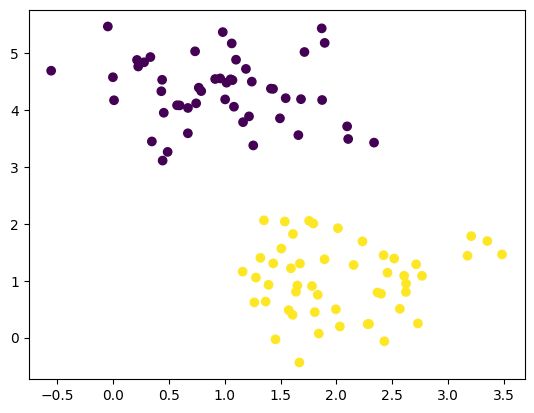

In [ ]:
# Scatter plot of generated data points
plt.scatter(X[:, 0], X[:, 1], c=y)

### Classification Problem and Algorithm Selection

- In this lecture, our primary focus revolves around tackling a classification problem, which represents a common scenario encountered in the realm of machine learning.
- Classification tasks involve assigning data points to discrete categories or classes based on their features, making it a fundamental aspect of numerous real-world applications.
- Prior algorithms discussed include logistic regression and decision trees, which are potential candidates for solving the problem.

### Logistic Regression Model Training

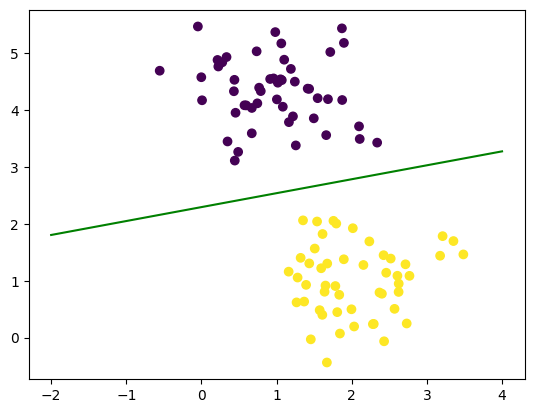

Slope (m): 0.2
Intercept (c): 2.3


In [ ]:
from sklearn.linear_model import LogisticRegression

# Instantiate and train Logistic Regression model
clf = LogisticRegression(random_state=0).fit(X, y)

# Extract model parameters: coefficients and intercept
W, b = clf.coef_[0], clf.intercept_

# Define x-values range for decision boundary
xfit = np.linspace(-2, 4, 5)

# Calculate corresponding y-values for decision boundary using linear equation
yfit = -(W[0]*xfit + b)/W[1]

# Scatter plot of data points with class labels
plt.scatter(X[:, 0], X[:, 1], c=y)

# Plot decision boundary line
plt.plot(xfit, yfit, color='g')

# Display the plot
plt.show()

# Calculate slope and intercept of the decision boundary line
m, c = -W[0]/W[1], -b[0]/W[1]
print("Slope (m):", np.round(m, 1))
print("Intercept (c):", np.round(c, 1))

**Creating a visualization of our classification problem by plotting data points, a decision boundary, and two additional lines with different parameters for comparison or illustration purposes.**

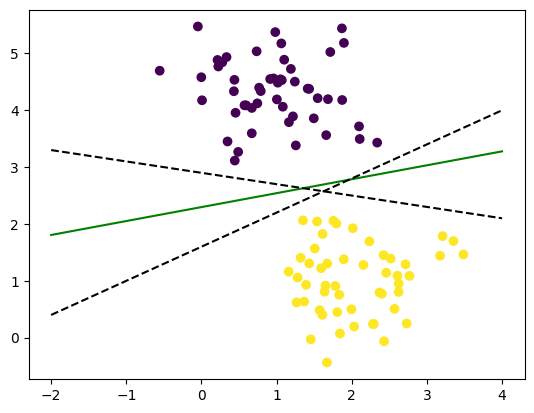

In [ ]:
# Scatter plot of data points
plt.scatter(X[:, 0], X[:, 1], c=y)

# Plot the decision boundary
plt.plot(xfit, yfit, color='g')

# Consider two line parameters
# Iterate over a list of tuples, each containing two parameters: slope (m_i) and y-intercept (b_i)
for m_i, b_i in [(0.6, 1.6), (-0.2, 2.9)]:
    # Plot the line defined by the current parameters (m_i, b_i)
    # Using a dashed line style ("--") and black color
    plt.plot(xfit, m_i * xfit + b_i, "--", c="black")

# Display the plot
plt.show()

- **Preference of Lines:** The above plot suggests that green line is preferred over others. This preference likely arises from their ability to better separate the classes in the data or to provide more accurate predictions.
- **Negative Log Likelihood:** In the realm of classification problems, we often utilize a metric known as the negative log likelihood to gauge the effectiveness of our models. This metric serves as a measure of how well our model aligns with the observed data. Maximizing the negative log likelihood translates to minimizing the classification error or, in simpler terms, enhancing the model's ability to accurately classify data points into their respective categories. Essentially, when we aim to maximize the negative log likelihood, we are striving to ensure that our model captures the patterns and distributions present in the data as closely as possible, thereby improving its performance in making accurate predictions."
- For green line negative loglikelihood is maximum that's why we prefer green line over other lines.


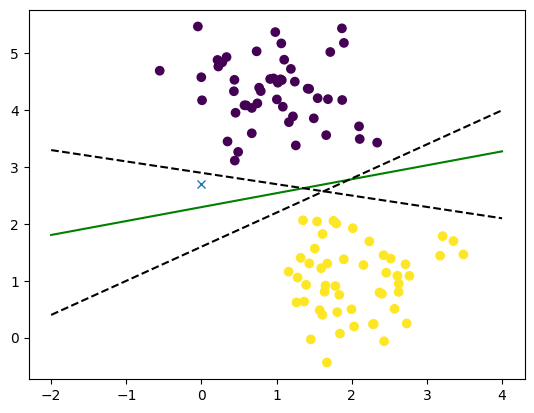

In [ ]:
# Scatter plot of data points
plt.scatter(X[:, 0], X[:, 1], c=y)

# Plot the decision boundary
plt.plot(xfit, yfit, color='g')

# Consider two line parameters
# Iterate over a list of tuples, each containing two parameters: slope (m_i) and y-intercept (b_i)
for m_i, b_i in [(0.6, 1.6), (-0.2, 2.9)]:
    # Plot the line defined by the current parameters (m_i, b_i)
    # Using a dashed line style ("--") and black color
    plt.plot(xfit, m_i * xfit + b_i, "--", c="k")

# Plot a marker at the point (0, 2.7)
plt.plot(0, 2.7, "x")

# Display the plot
plt.show()

### Types of Support Vector Machine (SVM) Algorithms

1. Linear SVM:
  - Applicable when the dataset is perfectly linearly separable, meaning the data points can be cleanly divided into two classes using a single straight line (in the case of 2D data).
  - Utilizes a linear decision boundary to segregate the classes.

2. Non-Linear SVM:
  - Employed when the dataset is not linearly separable, indicating that a single straight line cannot effectively classify the data points into two classes (in the case of 2D data).
  - Non-linear SVM employs advanced techniques such as kernel tricks to handle such scenarios.
  - Kernel tricks enable the SVM to implicitly map the input data into a higher-dimensional space where it becomes linearly separable, thus facilitating classification.


In real-world applications, it's common to encounter datasets that are not linearly separable, making non-linear SVMs with kernel tricks a valuable tool for effective classification.

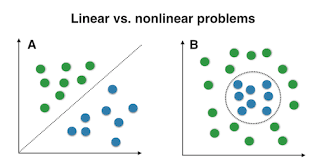

### Important Terms

1. **Support Vectors:**

  - Support vectors are data points that lie closest to the hyperplane within a dataset. These points play a crucial role in defining the separating boundary (hyperplane) between different classes.
  - The separating line or hyperplane is determined based on the positions of these support vectors.

2. **Margin:**

  - The margin in SVM refers to the distance between the hyperplane and the closest data points (support vectors). It represents the width of the corridor or space between the classes.
  - In SVM, a large margin is highly desirable as it indicates a clear separation between classes, leading to better generalization and robustness of the model.
  - There are two main types of margins in SVM: hard margin and soft margin. These will be discussed in detail in subsequent sections.

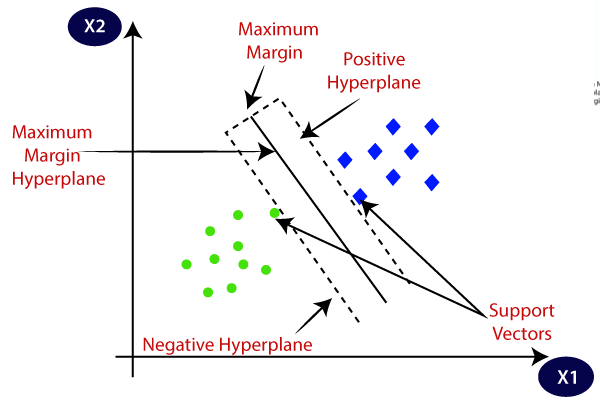

### How Does Support Vector Machine Work?

Support Vector Machine (SVM) operates in a manner where it primarily focuses on the support vectors, i.e., the data points closest to the hyperplane. Unlike logistic regression, where the classifier is defined over all points, SVM's efficacy stems from its reliance on these critical support vectors, allowing for inherent speed enhancements.

To illustrate the workings of SVM, let's consider an example. Imagine a dataset comprising two classes, represented by green and blue points.

The objective is to classify new data points into either the blue or green category.

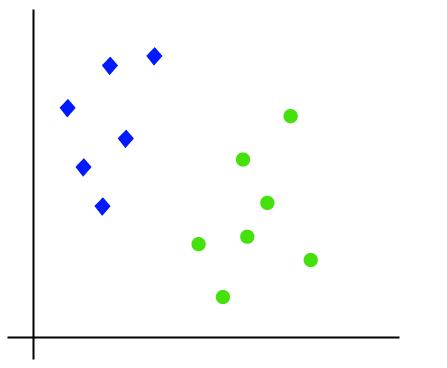

In this scenario, numerous decision boundaries can be drawn, but the challenge lies in determining the optimal one.

Note that in a 2-dimensional graph, this decision boundary is termed a "straight line," whereas in higher dimensions, it's referred to as a "hyperplane."



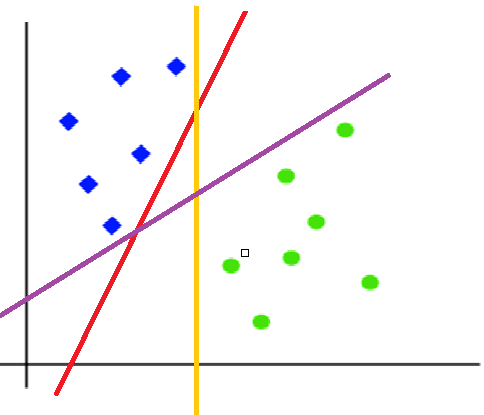

The crux of SVM lies in identifying the hyperplane that maintains the maximum distance from both classes.

This pursuit of maximizing the margin, or the distance between the hyperplane and the closest data points from each class, is central to SVM's operation.

SVM achieves this by exploring different hyperplanes and selecting the one that offers the greatest separation from the data points, effectively yielding the maximum margin.

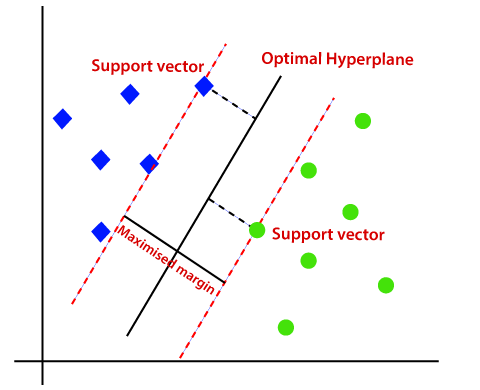

### Introduction of Maximum Margin Classifier

We all know the equation of a hyperplane is w.x+b=0 where w is a vector normal to hyperplane and b is an offset.

The equation of Hyperplane is w.x + b = 0, let's see this:

- **Definition of a Hyperplane:** In SVM, a hyperplane is a linear decision boundary that separates classes in a multidimensional space. In a binary classification problem, this hyperplane separates data points belonging to different classes.

- **Normal Vector and Offset:** In the equation w⋅x + b = 0, w represents a vector that is perpendicular (normal) to the hyperplane, and b represents the offset or bias term. The dot product w⋅x essentially calculates the projection of the vector x onto the vector w.

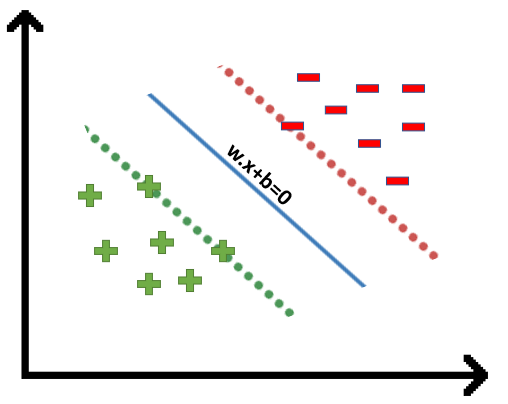

To classify a point as negative or positive we need to define a decision rule. We can define decision rule as:

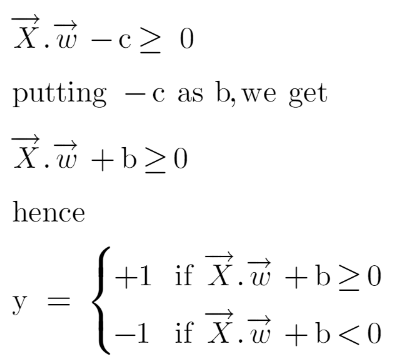

If the value of w.x+b>0 then we can say it is a positive point otherwise it is a negative point. Now we need (w,b) such that the margin has a maximum distance. Let's say this distance is 'd'.

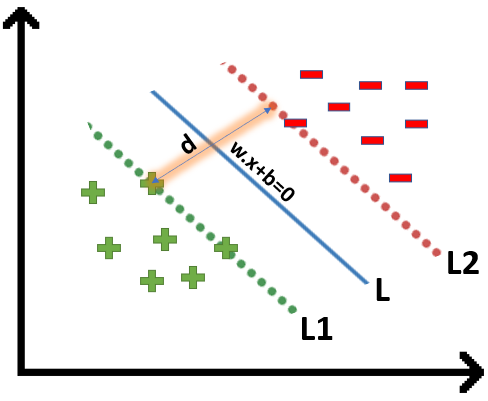

#### Decision Boundary Adjustment

- In conventional classification techniques like logistic regression, the decision boundary is typically a linear equation separating different classes.
- However, in the maximum margin classifier approach, the decision boundary equation is modified to better optimize the margin between classes.


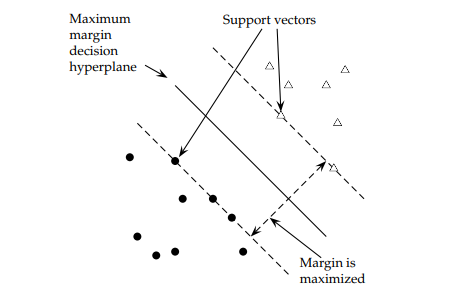

#### Definition of Decision Boundary

- The decision boundary, denoted as W<sup>T</sup>.X + b, now adheres to specific constraints:
  - For instances belonging to the positive class (y = 1), the decision boundary should satisfy W<sup>T</sup>.X + b ≥ 1
  -Conversely, for instances belonging to the negative class (y = 0), the decision boundary should meet W<sup>T</sup>.X + b ≤ -1.
- Representation of Classes:
  - The convention in this approach is to represent positive cases (those belonging to class 1) with y = 1.
  - Conversely, negative cases (belonging to class 0) are represented with y = -1.
  - This representation simplifies the mathematical formulation of the decision boundaries and constraints.
- Mathematical Convenience:
  - The choice of y = 1 for positive cases and y = -1 for negative cases offers mathematical convenience.
  - It allows for the formulation of a unified constraint (y.(W<sup>T</sup>.X + b) ≥ 1) that encompasses both positive and negative cases.
- Optimizing Margin Separation:
  - By setting up these constraints, the objective is to maximize the margin between the decision boundary and the instances of different classes.
  - This optimization aims to create a robust classifier with a clear margin of separation between classes.

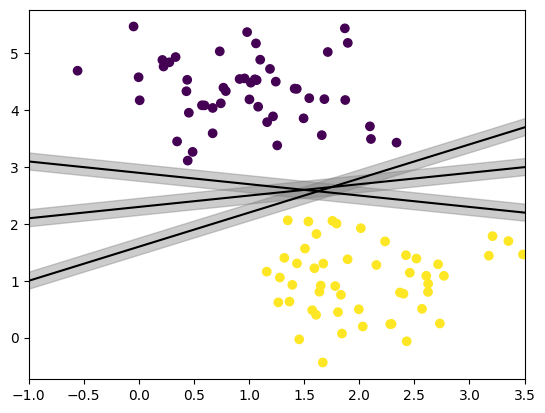

In [ ]:
# Generate scatter plot of data points
plt.scatter(X[:, 0], X[:, 1], c=y)

# Define width of the decision boundary
d = 0.15

# Initialize line number
line_no = 1

# Iterate over different slope-intercept pairs for decision boundaries
for m, c in [(0.6, 1.6), (-0.2, 2.9), (0.2, 2.3)]:
    # Calculate y-coordinates using the slope-intercept equation for each decision boundary
    yfit = m * xfit + c

    # Plot the decision boundary lines
    plt.plot(xfit, yfit, '-k')

    # Fill the area around the decision boundary lines to visualize the margin
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='grey', alpha=0.4)

# Set x-axis limits
plt.xlim(-1, 3.5)

# Save the x-axis and y-axis limits for later use
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

- The above code segment visualizes decision boundaries with margins around them to demonstrate the concept of maximizing class separation.
- It iterates over predefined slope-intercept pairs, calculates decision boundary equations, plots the boundaries, and fills the areas around them to represent the margin.
- Finally, it sets and saves the x-axis and y-axis limits for the plot.

#### Maximize Margin Width

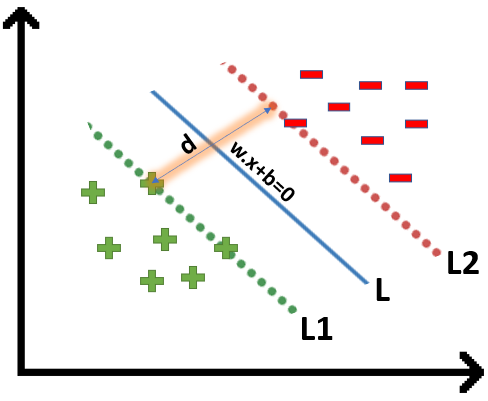

To calculate 'd' we need the equation of L1 and L2. For this, we will take few assumptions that the equation of L1 is w.x + b = 1 and for L2 it is w.x + b = -1.

**Now the question comes**

- **Why the magnitude is equal, why didn't we take 1 and -2?**
- **Why did we only take 1 and -1, why not any other value like 24 and -100?**
- **Why did we assume this line?**

**Let's address the questions raised:**

1. **Why is the magnitude equal? Why didn't we take 1 and -2 or any other values like 24 and -100?**

  - The decision to maintain equal magnitudes, such as 1 and -1, ensures symmetry in the distance between the hyperplane and the support vectors of both classes.
  - This symmetry contributes to maximizing the margin, which is crucial for robust classification. Using unequal magnitudes would result in an asymmetric margin, potentially compromising the model's performance.

2. **Why did we assume this specific line (represented by the equation 2x+y=2)?**

  - Multiplying the equation of the hyperplane by a constant demonstrates that the line's position remains unchanged, indicating that the specific coefficients of the equation are not critical.
  - Therefore, for mathematical convenience, we can standardize the equation to simplify calculations without affecting the line's position or orientation.
  - This standardization often involves choosing values that maintain simplicity and tractability while preserving the essential characteristics of the separating hyperplane.

3. **Why is there a need to assume only this line?**

  - The selection of the specific line is driven by the objective of achieving maximum separation between the classes, as evidenced by the maximum margin.
  - This line is chosen based on its ability to effectively segregate the data points while maintaining mathematical convenience.
  - Alternative lines may not provide the same level of separation or may introduce complexities that hinder the SVM's performance.

By considering these questions and explanations, we gain insights into the rationale behind the assumptions made in SVM and the importance of choosing the appropriate line for effective classification.

Graphical representations can further illustrate the impact of different lines on the separation of classes and the margin achieved by the SVM model.

Suppose the equation of our hyperplane is 2x+y=2:

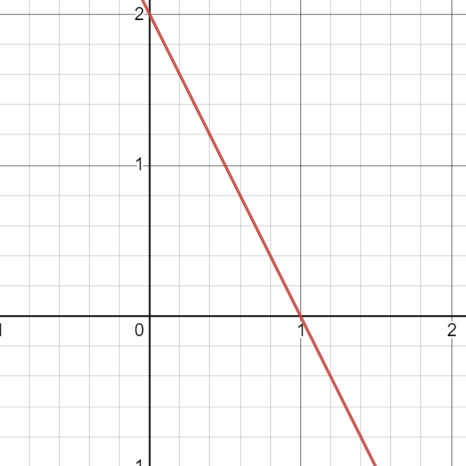

Let's create margin for this hyperplane,

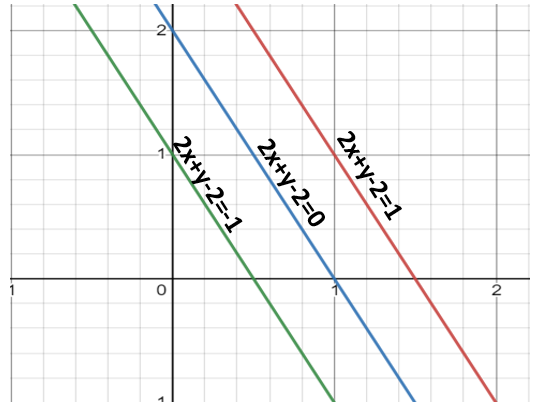

If you multiply these equations by 10, we will see that the parallel line (red and green) gets closer to our hyperplane.

We can also observe that if we divide this equation by 10 then these parallel lines get bigger.

**By this I wanted to show you that the parallel lines depend on (w,b) of our hyperplane, if we multiply the equation of hyperplane with a factor greater than 1 then the parallel lines will shrink and if we multiply with a factor less than 1, they expand.**

##### Optimization Function for Decision Boundary

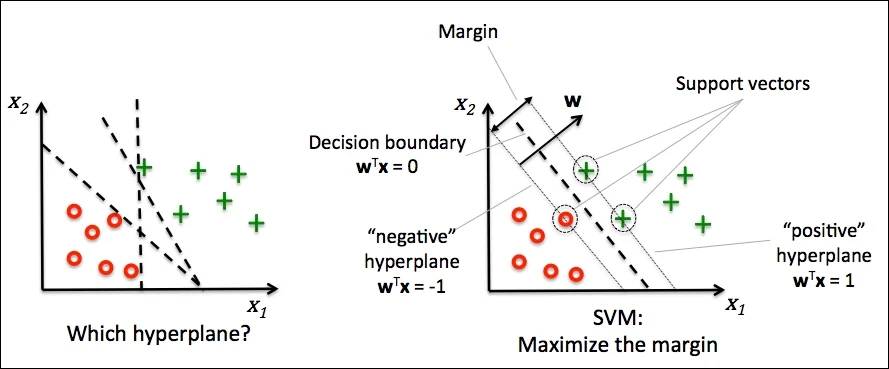

1. **Decision Boundary Equation:**

  - In the maximum margin classifier approach, the decision boundary equation changes. It is defined by:
    - W<sup>T</sup>⋅X + b ≥ 1 for y=1 (positive cases)
    - W<sup>T</sup>⋅X + b ≤ -1 for y=0 (negative cases)

Here, W represents a weight vector, X is the input vector, b is the bias term, and y represents the class label (1 for positive, 0 for negative).

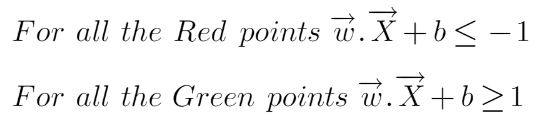

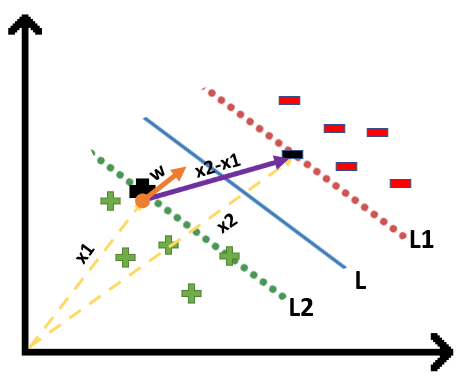

##### **Finding Projection of a Vector on Another Vector Using Dot Product**



We already know how to find the projection of a vector on another vector. We do this by dot-product of both vectors.

So let's see how

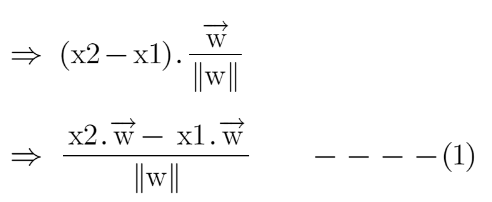

Since x2 and x1 are support vectors and they lie on the hyperplane, hence they will follow yi*(2.x+b)=1 so we can write it as:

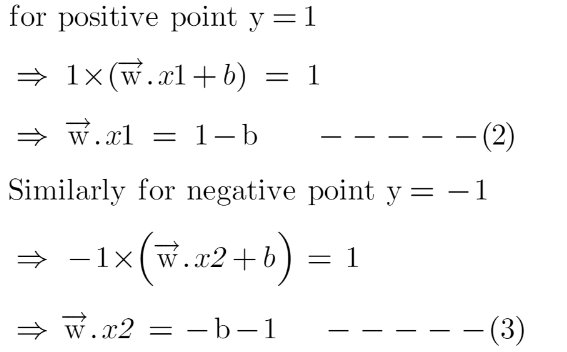

Putting equations (2) and (3) in equation (1) we get:

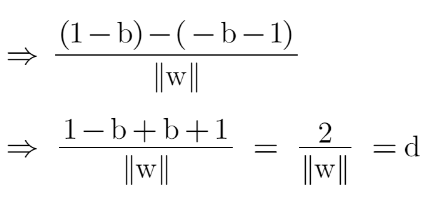

Hence the equation which we have to maximize is:

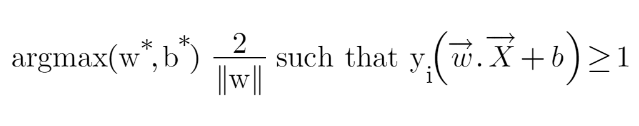

**Here is the whole derivation together we have described above:**

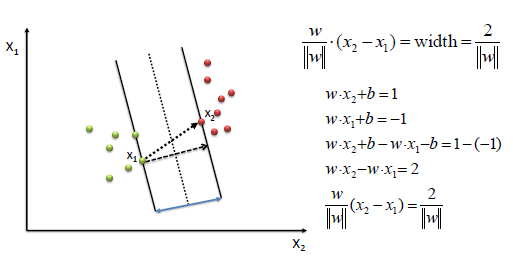

#### Advantages of Support Vector Machines (SVM)

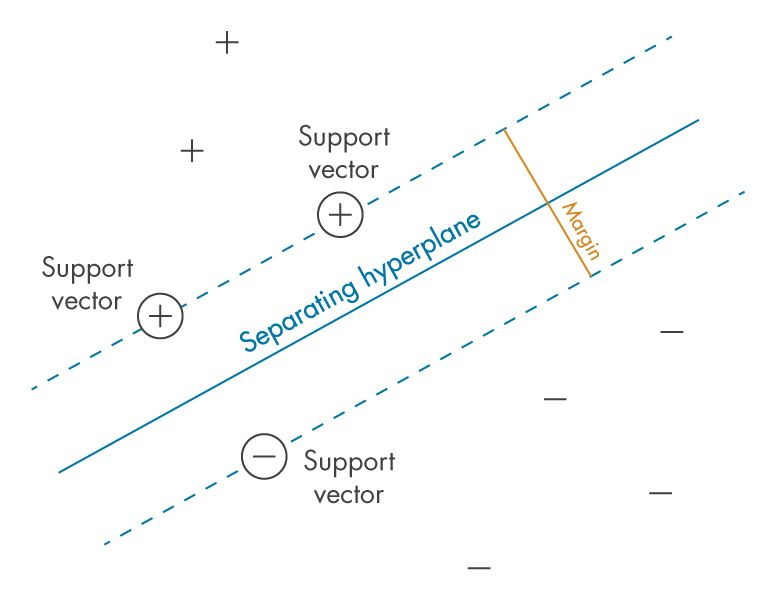

**Performance in Low Data Scenarios:**

- SVM excels when faced with limited training data compared to other machine learning models.
- While most models require abundant training data to generalize well, SVM can still perform effectively with less data.
- The key lies in identifying support vectors, not necessarily utilizing all available data points, making it resilient to data scarcity.

**Robustness to Outliers:**

- SVM is not significantly impacted by outliers, unlike many other models.
- Decision boundaries remain stable even in the presence of outliers, as SVM focuses primarily on support vectors.

**Handling Sparse Data:**

- Particularly adept at handling sparse data, such as text data.
- In scenarios where most values are zeros and only a few are non-zero (e.g., document-term matrices), SVM demonstrates robust performance.
- Traditional algorithms struggle with such sparse data, making SVM a preferred choice for tasks involving unstructured text data.

**Challenges and Limitations:**

- **Multi-collinearity:** SVM performance can degrade when dealing with highly correlated variables.
- **Variable Scaling:** It's crucial to scale all variables to a common scale to ensure equal importance, as SVM's performance can be influenced by differences in variable scales.
- **Handling Multi-collinearity:** Dropping variables exhibiting multi-collinearity may be necessary to maintain SVM's performance, as highly correlated variables can affect the weights assigned by the model.

### Implementation of SVM

#### Introduction to Support Vector Classifier (SVC)

- Support Vector Classifier (SVC) is a fundamental SVM model used for classification tasks.
- Key concepts include support vectors, which are crucial observations used to determine class predictions.
- The decision boundary is defined based on these support vectors, guiding predictions for new observations.

In [ ]:
# Importing Support Vector Classifier from scikit-learn's SVM module
from sklearn.svm import SVC

# Initializing a Support Vector Classifier model with a linear kernel and regularization parameter C set to a very high value (1 followed by 10 zeros)
model = SVC(kernel='linear', C=1E10)

# Fitting the model to the training data X and corresponding labels y
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

**SVC Parameters:**

- C: Controls the trade-off between achieving a smooth decision boundary and classifying training points correctly.
- Kernel: Determines the type of decision boundary (e.g., linear, non-linear).
- Gamma: Defines the influence of a single training example, affecting the flexibility of the decision boundary.
-Understanding these parameters is essential for effectively configuring an SVC model.

**Interpreting Support Vectors:**

- Support vectors are observations crucial for defining the decision boundary.
- The decision function assigns class labels based on the position of new observations relative to these support vectors.
- Support vectors lie either on or close to the decision boundary and play a significant role in classification.
- Support vectors determine the decision boundary, separating positive and negative classes.


In [ ]:
# Retrieving the support vectors from the trained Support Vector Classifier model
support_vectors = model.support_vectors_
support_vectors

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [1.35139348, 2.06383637]])

In [ ]:
# Calculating the decision function values for the support vectors using the trained Support Vector Classifier model
decision_function_values = np.round(model.decision_function(model.support_vectors_), 2)

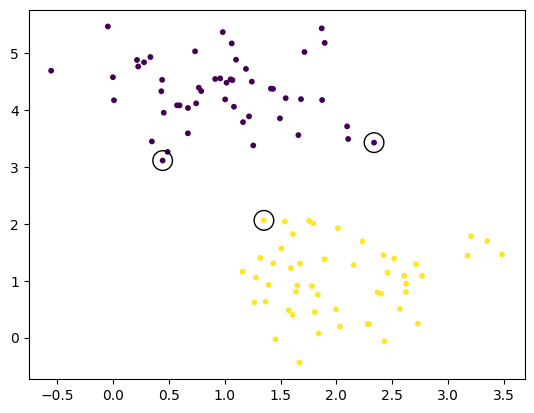

In [ ]:
# Scatter plot of the original data points colored by their class labels
plt.scatter(X[:, 0], X[:, 1], c=y, s=10)  # s=10 to decrease the size of points

# Scatter plot of the support vectors with larger size and black edge color
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=200, facecolors='none', edgecolors='k')

- **Through plotting decision boundaries, the efficacy of support vectors in guiding classification becomes evident.**

**Understanding Decision Boundaries:**

- Decision boundaries are depicted graphically to illustrate how support vectors influence classification.
- The decision boundary separates positive and negative classes, with support vectors playing a crucial role in its definition.
- Visualization aids in comprehending the impact of support vectors on classification outcomes.

In [ ]:
# Creating a grid of points to evaluate the model across the entire 2D plane
xfit = np.linspace(xlim[0], xlim[1], 30)  # Generating evenly spaced points along the x-axis within the specified x limits
yfit = np.linspace(ylim[0], ylim[1], 30)  # Generating evenly spaced points along the y-axis within the specified y limits

# Creating a mesh grid from the x and y coordinates
Y_grid, X_grid = np.meshgrid(yfit, xfit)

# Reshaping the mesh grid into a 2D array of points
xy = np.vstack([X_grid.ravel(), Y_grid.ravel()]).T

# Printing the shape of 'xy' to verify it contains all the data points in the 2D plane
print(xy.shape)

(900, 2)


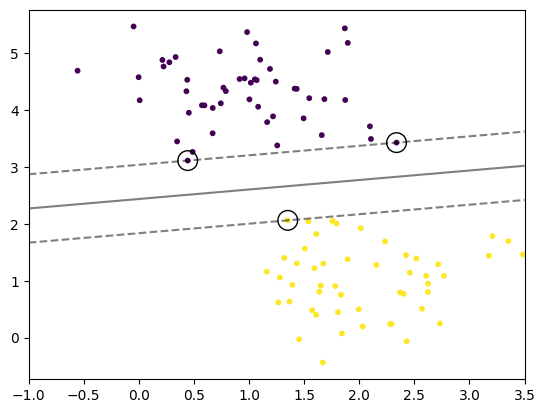

In [ ]:
def plot_svc_decision_function(model, ax=None):
    # """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()

    # Calculate the decision function values for all points in the grid and reshape the result as a grid
    P = model.decision_function(xy).reshape(X_grid.shape)

    # Plot the decision boundary and margins
    plt.contour(X_grid, Y_grid, P, colors='k',
                levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])

    # Scatter plot of the original data points colored by their class labels
    plt.scatter(X[:, 0], X[:, 1], c=y, s=10)

    # Scatter plot of the support vectors with larger size and black edge color
    plt.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=200, facecolors='none',
                edgecolors='k')

# Plotting the decision function for the given SVC model on the current axis
plot_svc_decision_function(model, ax)

- Above function plots the decision function for a 2D Support Vector Classifier (SVC) model.
- It calculates the decision function values for all points in the grid (xy) and reshapes the result as a grid.
- Then, it plots the decision boundary and margins using contour lines.
- Additionally, it overlays the original data points and the support vectors onto the plot.

**Challenges with Support Vectors:**

- Support vectors may face limitations in scenarios where a clear separation between classes doesn't exist.
- In regions where positive and negative points are densely packed near the decision boundary, support vectors may not effectively guide classification.

**Effect of Imbalanced Data:**

- Despite imbalanced data, support vectors are primarily influenced by the closest points to the decision boundary.
- Imbalance in the dataset, even with a significantly larger number of observations in one class, doesn't necessarily hinder SVM performance.
- However, excessive overlap between classes may slightly impact SVM effectiveness.

**Impact of New Observations:**

- The addition of new observations, particularly influential ones, near the decision boundary can significantly alter the decision boundary and the support vectors.
- In extreme cases, the decision boundary may undergo substantial shifts, potentially leading to a less optimal classification outcome.

**Handling Imbalanced Data:**

- SVMs are robust to imbalanced data, focusing more on the proximity of support vectors to the decision boundary rather than the overall distribution of observations.
- Despite potential challenges, SVMs maintain effectiveness in classifying imbalanced datasets, provided a clear separation exists between classes.

**Practical Application and Evaluation:**

- It's essential to continuously evaluate SVM performance, particularly in dynamic datasets where new observations may impact the decision boundary.
- Despite occasional limitations, SVMs offer robust classification capabilities and remain a valuable tool in various machine learning applications.


### Soft Margin Introduction

- Soft margin is introduced in support vector machines (SVM) to address scenarios where a perfect separation between classes isn't feasible.
- Unlike hard margin SVM, which requires strict classification without errors, soft margin SVM allows for some misclassification or error.

**Concept of Error Tolerance:**

- Soft margin SVM acknowledges the presence of misclassified points near the decision boundary and allows for a certain degree of error tolerance.
- The objective is to balance the need for accurate classification with the acceptance of a margin of error.

#### Soft Margin v/s Hard Margin

- Hard margin SVM demands perfect separation, resulting in rigid decision boundaries that may not adapt well to noisy or overlapping data.
- Soft margin SVM, on the other hand, is more flexible and accommodating of errors, enabling it to handle complex datasets with greater adaptability.

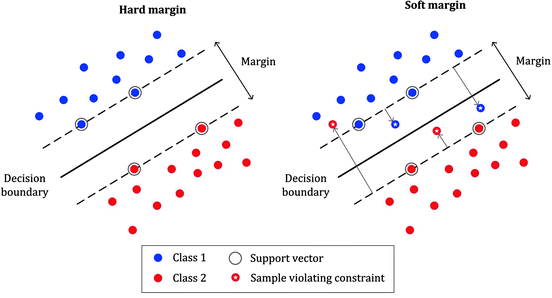

**Cost Function Adjustment:**

- Introducing soft margin entails modifying the cost function in SVM.
- The cost function is adjusted to minimize the impact of misclassified points while still maintaining a clear decision boundary.

**Error Handling in Soft Margin:**

- In soft margin SVM, errors are quantified and minimized through the cost function.
- The goal is to strike a balance between minimizing misclassification errors and maintaining a reasonable margin of tolerance.

**Visual Representation:**

- Soft margin is visually represented as a broader boundary that allows for some overlap between classes, accommodating misclassified points within a specified tolerance level.
- The objective is to find an optimal decision boundary that minimizes errors while maximizing classification accuracy.

**Flexibility and Adaptability:**

- Soft margin SVM offers greater flexibility and adaptability compared to hard margin SVM, making it suitable for datasets with varying degrees of complexity and noise.
- By allowing for a controlled margin of error, soft margin SVM enhances robustness and generalization capability.

### Hinge Loss

- Hinge loss is another cost function utilized in support vector machines (SVM) to optimize classification by penalizing misclassification.
- It evaluates the degree of error in classification, assigning higher penalties for misclassifications and lower penalties for correct classifications.

**Hinge Loss Function:**

The hinge loss function is defined as:

Loss = max(0, 1 - y<sub>i</sub>(w<sup>T</sup>X + b))

- y<sub>i</sub> represents the true class label,
- w<sup>T</sup>X + b is the decision function output of the SVM,
- The hinge loss function penalizes misclassifications by increasing the loss value and keeps the loss minimal or zero for correct classifications.

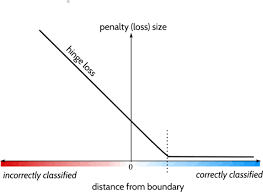

**Behavior of Hinge Loss:**

- Correctly classified observations result in minimal or near-zero loss values.
- Misclassified observations lead to higher loss values, with the loss increasing proportionally to the degree of misclassification.

**Penalty for Misclassifications:**

- In hinge loss, the penalty for misclassifications is significant, as it aims to incentivize correct classification by minimizing the loss function.
- Misclassified points incur a higher penalty, contributing to a larger overall loss.

**Role in SVM Optimization:**

- Hinge loss plays a crucial role in optimizing SVM by adjusting the model parameters to minimize misclassification errors.
- It ensures that the SVM decision boundary is optimized to correctly classify data points while penalizing misclassifications appropriately.

### Combining Cost Functions in Support Vector Machines (SVM)

- Combining cost functions in SVM involves integrating multiple objectives to optimize classification performance effectively.

**Cost Function Combination:**

- To incorporate both hinge loss and regularization, the combined cost function is formulated as:

cost = 1/2||w||<sup>2</sup> + C*∑<sup>n</sup><sub>i=1</sub>max(0, 1 - y<sub>i</sub>(w<sup>T</sup>X + b))

Here, C represents the regularization parameter

**Regularization Parameter:**

- The regularization parameter C controls the balance between minimizing the margin and penalizing misclassifications.
- It influences the flexibility of the decision boundary by adjusting the trade-off between margin maximization and error minimization.

**Regularization in SVM:**

- In SVM, regularization is crucial for preventing overfitting and controlling the complexity of the model.
- A small value of C allows more flexibility, while a large value of C enforces a stricter margin and reduces overfitting.

**Role of Regularization Parameter(C):**

- C determines the degree of regularization applied to the SVM model.
- Higher values of C lead to stronger regularization, favoring simpler decision boundaries and reducing the risk of overfitting.

**Slack Variable Interpretation:**

- C is also known as the slack variable, allowing flexibility in classification by permitting misclassifications.
- It prevents excessive penalization for individual misclassified points, ensuring that the overall classification performance is optimized.

**Effect of C on Decision Boundary:**

- A large C value corresponds to a hard margin SVM, where misclassifications are heavily penalized, leading to a stricter decision boundary.
- Conversely, a small C value results in a soft margin SVM, allowing more misclassifications and a more flexible decision boundary.

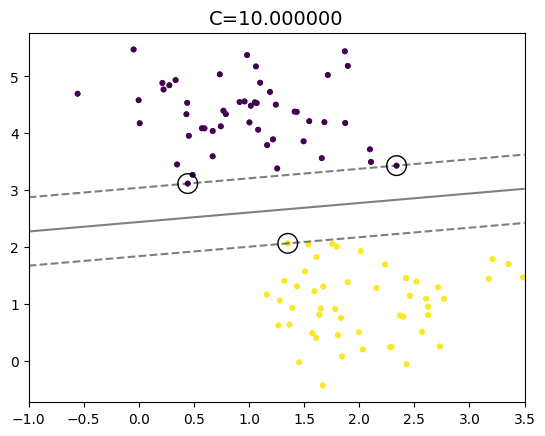

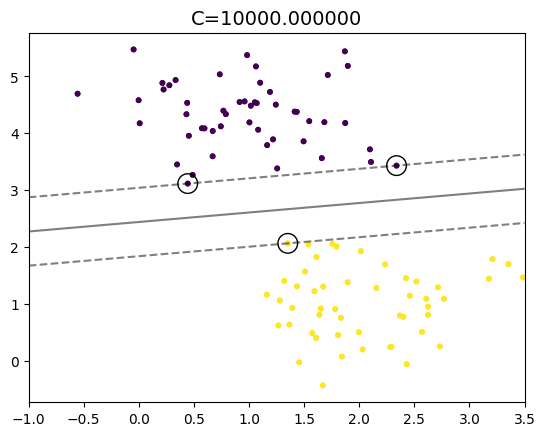

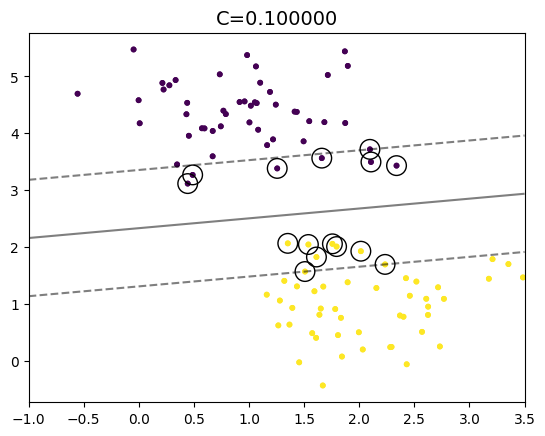

In [ ]:
# Looping through different values of C
for C in [10, 10000, 0.1]:
    # Creating a new figure for each value of C
    plt.figure()

    # Initializing a Support Vector Classifier with a linear kernel and the current value of C
    model = SVC(kernel='linear', C=C).fit(X, y)

    # Plotting the data points and decision boundary
    plt.scatter(X[:, 0], X[:, 1], c=y, s=10)
    plot_svc_decision_function(model)

    # Adding title to the plot
    plt.title('C={0:1f}'.format(C), size=14)

# Displaying the plots
plt.show()

**Observations:**

- **C = 10:** With a moderate value of C, the model forms a hard boundary. No errors are permitted, resulting in a tight decision boundary.
- **C = 10,000:** Even with a significantly larger value of C, the decision boundary remains similar to when C was 10. This suggests that for this particular dataset, increasing C doesn't significantly affect the boundary.
- **C = 0.1:** With a small value of C, the model allows errors in classification, leading to a soft margin. Despite intentionally introducing errors, the model still learns a boundary, showing flexibility in accommodating mistakes.

**Interpretation of Results:**

- **Soft Margin vs. Hard Margin:** Lower values of C allow for a soft margin, permitting some misclassifications, while higher values enforce a hard margin, where misclassifications are not tolerated.
- **Model Flexibility:** Lower values of C introduce flexibility by allowing the model to make mistakes, potentially improving generalization to unseen data.
- **Regularization:** The parameter C acts as a regularization parameter, controlling the trade-off between margin width and training error. Smaller C values result in stronger regularization, while larger values lead to less regularization.

## Kernelization in SVM

1. **Introduction to Non-linearity:**

- Kernelization in Support Vector Machines (SVMs) addresses the limitation of linear separability in traditional SVMs.
- When data cannot be effectively separated by a linear boundary, kernelized SVMs offer a solution by operating in higher-dimensional spaces.

2. **Kernel Functions and Data Transformation:**

- Kernel functions serve as mathematical mappings that transform data from the input space into higher-dimensional feature spaces.
- These transformations allow SVMs to find complex decision boundaries that can effectively separate non-linear data distributions.

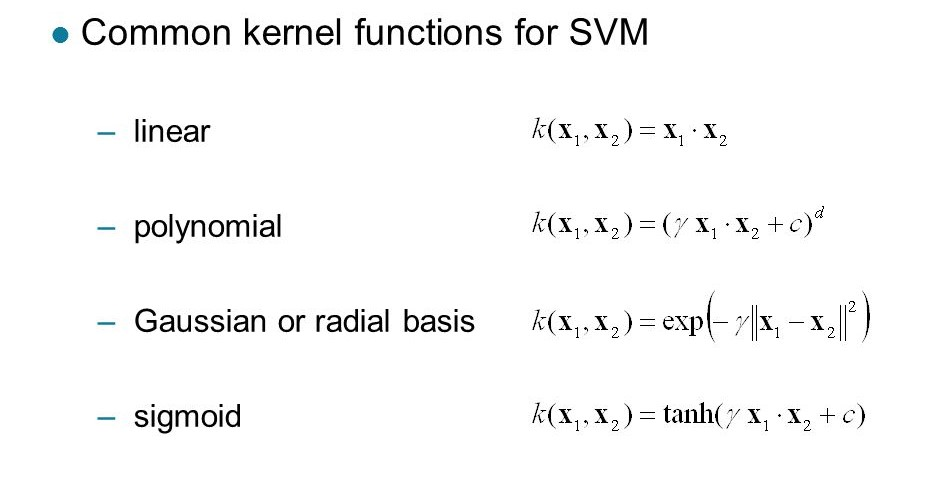

3. **Exploring Popular Kernels:**

- Various kernel functions are available, each tailored to handle different types of data and separability challenges.
- The **Linear Kernel** computes the dot product of input vectors, suitable for linearly separable data where a straight boundary suffices.
- In contrast, the **Polynomial Kernel** introduces polynomial transformations, enabling SVMs to capture non-linear relationships by considering higher-order interactions.
- The **Gaussian Kernel** applies a Gaussian transformation, also known as the radial basis function (RBF), to represent data in a higher-dimensional space where non-linear separations are feasible.
- Additionally, the **Sigmoid Kernel** employs a sigmoid function to map data into a higher-dimensional space, offering flexibility in capturing complex decision boundaries.

4. **Role of Kernel Parameters:**

- Parameters such as gamma play a crucial role in shaping the decision boundary and determining the flexibility of the SVM model.
- Gamma controls the "spread" of the kernel function, influencing the smoothness and complexity of the decision boundary.
- Lower gamma values result in smoother decision boundaries resembling linear separators, while higher gamma values yield more intricate, non-linear boundaries.

5. **The Kernel Trick for Computational Efficiency:**

- The kernel trick is a clever optimization technique that simplifies computations by representing dot products of transformed data pairs without explicitly mapping data into higher dimensions.
- By leveraging the properties of kernel functions, the kernel trick efficiently computes dot products in the higher-dimensional feature space, avoiding the computational overhead of explicit transformation.
- This approach maintains the advantages of operating in higher-dimensional spaces while significantly reducing computational complexity, making kernelized SVMs computationally efficient and feasible for practical applications.

6. **Practical Applications and Benefits:**

- Kernelized SVMs offer a powerful tool for handling complex, non-linear separations in various real-world scenarios.
- The combination of different kernel functions and parameter settings allows SVMs to adapt to diverse datasets and capture intricate decision boundaries effectively.
- Despite the theoretical complexity of kernelized SVMs, the kernel trick and optimized algorithms ensure that they remain practical and computationally efficient, striking a balance between accuracy and computational cost in machine learning tasks.

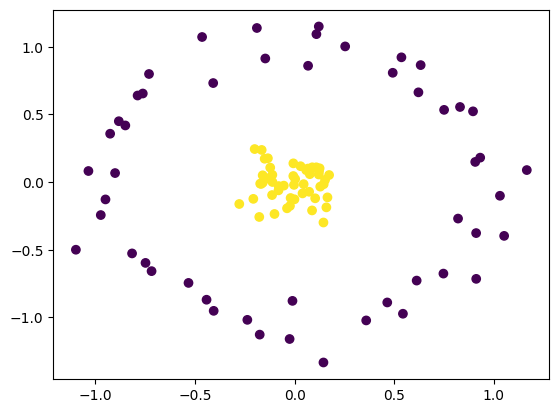

In [ ]:
# Creating a non-linear dataset using make_circles function
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1, random_state=0)

# Plotting the dataset
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

**If we implement Logistic Regression for the above model, will we obtain perfect results?**

### Implementing Logistic Regression for above dataset

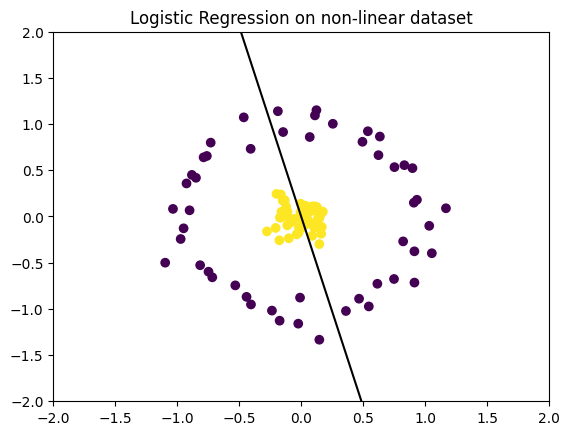

In [ ]:
from sklearn.linear_model import LogisticRegression  # Importing Logistic Regression from scikit-learn's linear_model module

# Training a Logistic Regression model on the dataset
clf = LogisticRegression(random_state=0).fit(X, y)

# Retrieving the coefficients and intercept of the trained Logistic Regression model
W, b = clf.coef_[0], clf.intercept_

# Creating a new figure for plotting
plt.figure()

# Generating points along the x-axis
xfit = np.linspace(-2, 4, 5)

# Calculating corresponding points along the y-axis using the learned coefficients and intercept to draw the decision boundary
yfit = -(W[0]*xfit + b)/W[1]

# Scatter plot of the original data points colored by their class labels
plt.scatter(X[:, 0], X[:, 1], c=y)

# Plotting the decision boundary obtained from the logistic regression model
plt.plot(xfit, yfit, c="k")

# Adding a title to the plot
plt.title("Logistic Regression on non-linear dataset")

# Setting the x-axis and y-axis limits for better visualization
plt.xlim(-2, 2)
plt.ylim(-2, 2)

# Displaying the plot
plt.show()

- In above code an attempt was made to build a logistic regression model on the dataset.
- The objective was to observe its performance in generating a suitable separator.
- However, the outcome was unsatisfactory. The accuracy of the logistic regression model was deemed to be poor, with an estimated accuracy comparable to random guessing.
- It was observed that approximately half of the predictions were correct, while the other half were incorrect.
- Consequently, the reliability of this model was questioned, and it was concluded that it cannot be trusted for effectively separating the dataset.

### Implementing SVM with Linear Kernel

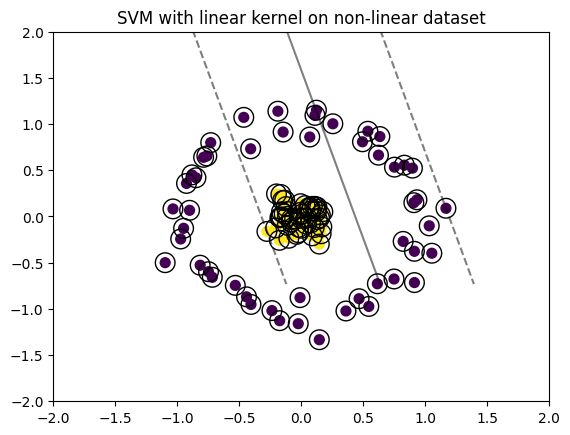

In [ ]:
# Training a Support Vector Classifier with a linear kernel on the dataset
clf = SVC(kernel='linear').fit(X, y)

# Scatter plot of the original data points colored by their class labels
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)

# Adding a title to the plot
plt.title("SVM with linear kernel on non-linear dataset")

# Setting the x-axis and y-axis limits for better visualization
plt.xlim(-2, 2)
plt.ylim(-2, 2)

# Plotting the decision function for the trained SVC model
plot_svc_decision_function(clf)

### Implementing SVM with rbf Kernel

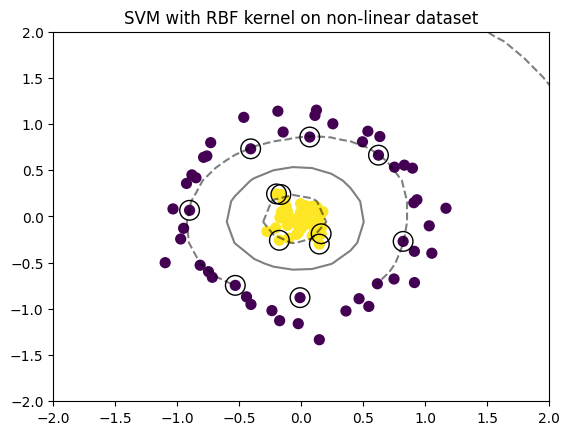

In [ ]:
# Training a Support Vector Classifier with a radial basis function (RBF) kernel on the dataset
clf = SVC(kernel='rbf').fit(X, y)

# Scatter plot of the original data points colored by their class labels
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)

# Adding a title to the plot
plt.title("SVM with RBF kernel on non-linear dataset")

# Setting the x-axis and y-axis limits for better visualization
plt.xlim(-2, 2)
plt.ylim(-2, 2)

# Plotting the decision function for the trained SVC model
plot_svc_decision_function(clf)

## Dual Form of Cost Function

1. **Introduction to Dual Formulation:**

- The dual formulation of Support Vector Machine (SVM) optimization provides an alternative approach to solving the primal SVM problem.
- It is based on transforming the optimization problem to its dual form, which offers computational advantages and insights into the model's behavior.

2. **Expressing Weight Vector Norm:**

- In the primal SVM formulation, the optimization objective involves minimizing the norm of the weight vector (||w||).
- The dual formulation represents ||w|| as a dot product of Lagrange multipliers (alpha) and the data points (x).
- This transformation simplifies the optimization problem and enables the use of dot products for efficient computation.



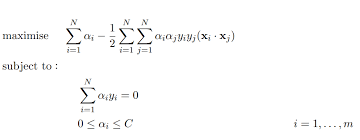

3. **Introduction of Lagrange Multipliers:**

- Lagrange multipliers (alpha) are introduced as coefficients associated with each data point in the optimization process.
- These multipliers serve as dual variables that are optimized alongside the primary decision variables (weight vector and bias).
- Alpha values indicate the significance of each data point in determining the optimal decision boundary and support vector classification.

4. **Optimization Objective:**

- The objective of the dual formulation is to maximize the dot product between alpha and data points.
- This maximization aims to find the optimal combination of Lagrange multipliers that best represent the decision boundary and support vectors.
- By maximizing the dot product, the dual formulation seeks to achieve a robust separation of classes and effective classification performance.

5. **Efficient Computation and Decision Boundary Estimation:**

- The dual formulation simplifies the optimization problem to a set of dot products between alpha and data points.
- This computational approach offers efficiency in handling large-scale datasets and complex decision boundaries.
- By focusing on dot products, the algorithm can efficiently estimate the decision boundary without explicitly mapping data into higher-dimensional spaces.

6. **Advantages of Dual Formulation:**

- The dual formulation allows SVMs to handle large-scale datasets more efficiently compared to the primal formulation.
- It offers insights into the importance of individual data points through their corresponding Lagrange multipliers.
- By optimizing alpha values, the dual formulation enables the SVM model to adapt to complex decision boundaries and achieve optimal classification performance.

## Use Case for Comparing Different Techniques

[Download Dataset From Here](https://drive.google.com/file/d/1Tr8jOP2HxFhTZFXnUoqRH1YQpmX4DpI1/view?usp=sharing)

### Problem Statement

- The problem involves email classification, particularly distinguishing between spam and ham emails.
- Notably, there's a challenge of class imbalance, with a significantly smaller number of spam observations compared to ham.
- Additionally, text data preprocessing is required to clean and standardize the email content for analysis.

In [ ]:
# Importing necessary libraries for data handling, visualization, and machine learning
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm

# Importing specific modules for model selection and evaluation from scikit-learn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Importing regular expression module for text preprocessing
import re

# Importing NLTK (Natural Language Toolkit) for text processing tasks
import nltk
nltk.download('punkt')  # Downloading NLTK resource for tokenization
nltk.download('stopwords')  # Downloading NLTK resource for stopwords

# Importing specific functions for tokenization and stopwords from NLTK
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords

# Suppressing warning messages
import warnings
warnings.filterwarnings('ignore')

# Magic command for displaying plots inline within Jupyter Notebook
%matplotlib inline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from google.colab import drive

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Trying different encodings if UTF-8 fails to read the CSV file
try:
    df = pd.read_csv('/content/drive/MyDrive/spam.csv', encoding='utf-8')
except UnicodeDecodeError:
    # Trying Latin-1 encoding if UTF-8 fails
    try:
        df = pd.read_csv('/content/drive/MyDrive/spam.csv', encoding='latin1')
    except UnicodeDecodeError:
        # Trying ISO-8859-1 encoding if Latin-1 fails
        try:
            df = pd.read_csv('/content/drive/MyDrive/spam.csv', encoding='ISO-8859-1')
        except UnicodeDecodeError:
            # Trying cp1252 encoding if ISO-8859-1 fails
            df = pd.read_csv('/content/drive/MyDrive/spam.csv', encoding='cp1252')

# Displaying the first few rows of the DataFrame
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

Dropping unnecessary columns.

In [ ]:
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)

In [ ]:
df.columns

Index(['v1', 'v2'], dtype='object')

In [ ]:
# Rename the columns
df = df.rename(columns={'v1': 'type', 'v2': 'message'})

# Display the columns after renaming
df.columns

Index(['type', 'message'], dtype='object')

In [ ]:
df.head()

,type,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Data Description

- The data consists of email classification information.
- Each email has content stored in the "message" column.
- Classification into spam or good (ham) email is indicated by the "type" variable.
- The "type" variable is binary, with two categories: spam and ham.

### Class Imbalance

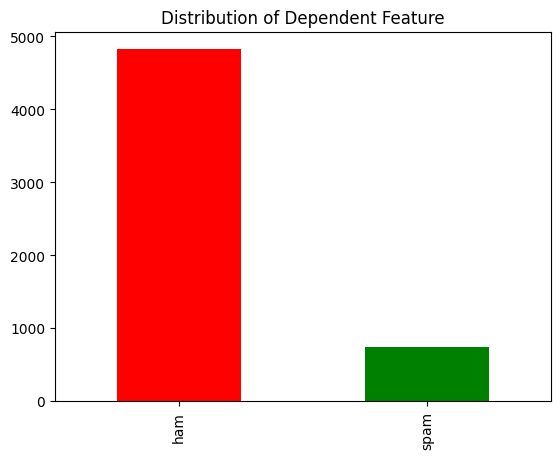

In [ ]:
# Calculating the frequency of each category in the 'type' column of the DataFrame
freq = pd.value_counts(df['type'], sort=True)

# Plotting the distribution of the dependent feature using a bar plot
freq.plot(kind='bar', color=["red", "green"])

# Adding a title to the plot
plt.title("Distribution of Dependent Feature")

# Displaying the plot
plt.show()

- There is a class imbalance issue in the data.
- Only 1000 observations belong to spam emails, while around 5000 observations belong to ham emails.
- "Ham" emails refer to good emails, while "spam" refers to unwanted emails.

### Data Preprocessing

#### Text Processing

1. **Removing Unnecessary Characters:**
  - This involves getting rid of any characters that do not contribute to the meaning or analysis of the text.
  - For example, punctuation marks, special characters, etc., might be removed.

2. **Dropping Irrelevant Words:**
  - Certain words might not carry significant meaning for the analysis or might introduce noise. These words are dropped from the text.
  - This process often involves creating a list of such words known as stop words.

3. **Converting Text to Lowercase:**
  - Uniformity in text casing is important for analysis.
  - Converting all text to lowercase ensures that words are treated the same regardless of their original casing.

4. **Using Regular Expressions to Remove Unwanted Elements:**
  - Regular expressions are powerful tools for pattern matching and manipulation of text.
  - They can be used to identify and remove specific patterns or elements from the text data.

5. **Removing Stop Words:**
  - Stop words are common words in a language (e.g., "and", "the", "is") that are often filtered out during text analysis because they do not carry significant meaning.
  - Removing stop words helps reduce noise and improve the efficiency of text analysis algorithms.

**Data Cleaning Function:**

We will create a function for cleaning the text data. This function is designed to perform the following tasks:

- **Target Variable:** The function specifically targets the "message" variable, which contains the text data (presumably the body of the emails in this case).

- **Output:** The cleaned data is stored in a variable named "clean_message," indicating that it's a cleaned version of the original text data.

- **Conversion to Lowercase:** One aspect of the cleaning function is converting all text to lowercase. This ensures consistency and simplifies subsequent analysis. However, it's noted that this step may not eliminate all unnecessary elements from the text.

**Complexity Limitation:**

The complexity of text processing is intentionally limited for the following reasons:

- **Focus on Non-NLP Tasks:**
  - The primary focus is not on natural language processing (NLP) or text mining tasks.
  - Therefore, the text processing steps are kept simple and focused on basic cleaning rather than advanced NLP techniques.

- **Assumption of Plain English Text:**
  - It's assumed that the text data consists of plain English.
  - This simplifies the processing since it avoids the need to handle complexities introduced by multiple languages or specialized text formats.

- **Skipping Multilingual Handling:**
  - The handling of multiple languages is skipped for simplicity.
  - This decision further reduces complexity, as dealing with multilingual text adds additional challenges and requires more sophisticated processing techniques.

In [ ]:
def clean_tokenized_sentence(s):
    # Performs basic cleaning of a tokenized sentence
    cleaned_s = ""  # Create an empty string to store processed sentence
    words = nltk.word_tokenize(s)  # Tokenize the input sentence
    for word in words:
        # Convert word to lowercase
        c_word = word.lower()
        # Remove punctuation
        c_word = re.sub(r'[^\w\s]', '', c_word)
        # Remove stopwords
        if c_word != '' and c_word not in stopwords.words('english'):
            cleaned_s = cleaned_s + " " + c_word  # Append processed words to the new list
    return cleaned_s.strip()

In [ ]:
# Applying the clean_tokenized_sentence function to each message in the 'message' column of the DataFrame
df["cleaned_message"] = df["message"].apply(clean_tokenized_sentence)

In [ ]:
df.head()

,type,message,cleaned_message
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah nt think goes usf lives around though


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   type             5572 non-null   object
 1   message          5572 non-null   object
 2   cleaned_message  5572 non-null   object
dtypes: object(3)
memory usage: 130.7+ KB


##### Plotting most frequent words in non-spam and spam message

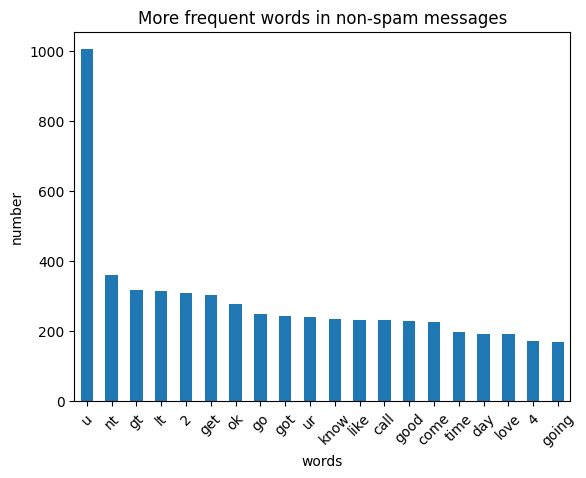

In [ ]:
# Counting the most common words in non-spam (ham) messages
counter_ham = Counter(" ".join(df[df['type'] == 'ham']["cleaned_message"]).split()).most_common(20)

# Creating a DataFrame from the counter dictionary
df_ham = pd.DataFrame.from_dict(counter_ham)

# Renaming columns of the DataFrame
df_ham = df_ham.rename(columns={0: "words in non-spam", 1: "count"})

# Plotting a bar chart for the most frequent words in non-spam messages
df_ham.plot.bar(legend=False)

# Setting the x-axis labels to the words and rotating them for better readability
y_pos = np.arange(len(df_ham["words in non-spam"]))
plt.xticks(y_pos, df_ham["words in non-spam"], rotation=45)

# Adding title and axis labels to the plot
plt.title("More frequent words in non-spam messages")
plt.xlabel('words')
plt.ylabel('number')

# Displaying the plot
plt.show()

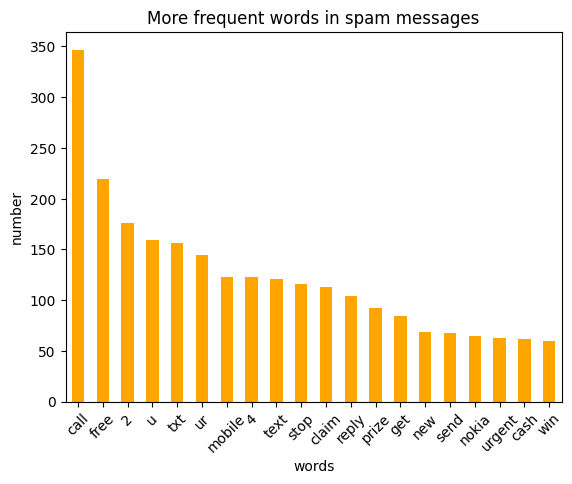

In [ ]:
# Counting the most common words in spam messages
counter_spam = Counter(" ".join(df[df['type'] == 'spam']["cleaned_message"]).split()).most_common(20)

# Creating a DataFrame from the counter dictionary
df_spam = pd.DataFrame.from_dict(counter_spam)

# Renaming columns of the DataFrame
df_spam = df_spam.rename(columns={0: "words in spam", 1: "count"})

# Plotting a bar chart for the most frequent words in spam messages
df_spam.plot.bar(legend=False, color='orange')

# Setting the x-axis labels to the words and rotating them for better readability
y_pos = np.arange(len(df_spam["words in spam"]))
plt.xticks(y_pos, df_spam["words in spam"], rotation=45)

# Adding title and axis labels to the plot
plt.title("More frequent words in spam messages")
plt.xlabel('words')
plt.ylabel('number')

# Displaying the plot
plt.show()

In [ ]:
# Creating a CountVectorizer object
f = feature_extraction.text.CountVectorizer()

# Transforming the cleaned messages into a sparse matrix of token counts
X = f.fit_transform(df["cleaned_message"])


In [ ]:
# Mapping the 'type' column to binary labels: 'spam' to 1 and 'ham' to 0
df["type"] = df["type"].map({'spam': 1, 'ham': 0})

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, df['type'], test_size=0.25, random_state=42)

# Printing the shapes of the training and testing sets
print([np.shape(X_train), np.shape(X_test)])

[(4179, 8951), (1393, 8951)]


In [ ]:
# Initializing a dictionary to store performance metrics
perf = {
    'algorithm_name': [],  # List to store algorithm names
    'cv_score_f1': [],     # List to store cross-validated F1 scores
    'cv_std_f1': []        # List to store standard deviations of cross-validated F1 scores
}

### Model Creating

#### Decision Tree Classifier

In [ ]:
# Initializing a Decision Tree Classifier with a maximum depth of 5
clf = DecisionTreeClassifier(max_depth=5)

# Performing cross-validation to evaluate the classifier's performance
cv_scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=5, scoring='f1')

In [ ]:
# Appending performance metrics for Decision Trees to the 'perf' dictionary
perf['algorithm_name'].append('Decision Trees')          # Adding algorithm name
perf['cv_score_f1'].append(round(cv_scores.mean() * 100, 1))  # Adding mean cross-validated F1 score
perf['cv_std_f1'].append(round(cv_scores.std(), 2))           # Adding standard deviation of cross-validated F1 scores

#### Random Forest Classifier

In [ ]:
# Initializing a Random Forest Classifier with 50 estimators and a maximum depth of 20
clf = RandomForestClassifier(n_estimators=50, max_depth=20)

# Performing cross-validation to evaluate the classifier's performance
cv_scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=5, scoring='f1')


In [ ]:
# Appending performance metrics for Random Forest to the 'perf' dictionary
perf['algorithm_name'].append('Random Forest')          # Adding algorithm name
perf['cv_score_f1'].append(round(cv_scores.mean() * 100, 1))  # Adding mean cross-validated F1 score
perf['cv_std_f1'].append(round(cv_scores.std(), 2))           # Adding standard deviation of cross-validated F1 scores

#### SVM with Linear Kernel

In [ ]:
# Initializing a Support Vector Classifier with a linear kernel
clf = SVC(kernel='linear')

# Performing cross-validation to evaluate the classifier's performance
cv_scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=5, scoring='f1')

In [ ]:
# Appending performance metrics for SVM with linear kernel to the 'perf' dictionary
perf['algorithm_name'].append('SVM Linear')          # Adding algorithm name
perf['cv_score_f1'].append(round(cv_scores.mean() * 100, 1))  # Adding mean cross-validated F1 score
perf['cv_std_f1'].append(round(cv_scores.std(), 2))           # Adding standard deviation of cross-validated F1 scores

#### SVM with rbf Kernel

In [ ]:
# Initializing a Support Vector Classifier with a radial basis function (RBF) kernel
clf = SVC(kernel='rbf')

# Performing cross-validation to evaluate the classifier's performance
cv_scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=5, scoring='f1')


In [ ]:
# Appending performance metrics for SVM with RBF kernel to the 'perf' dictionary
perf['algorithm_name'].append('SVM rbf')          # Adding algorithm name
perf['cv_score_f1'].append(round(cv_scores.mean() * 100, 1))  # Adding mean cross-validated F1 score
perf['cv_std_f1'].append(round(cv_scores.std(), 2))           # Adding standard deviation of cross-validated F1 scores

#### Comparision of all the models

**Evaluation Metrics:**

- The assessment of model performance involves the consideration of two primary metrics: mean accuracy and standard deviation.
- Mean accuracy provides an overarching measure of a model's effectiveness in correctly predicting outcomes.
- Standard deviation indicates the variability in performance across different cross-validation folds.

**Importance of Generalization:**

- Generalization, referring to a model's ability to perform well on unseen data, is fundamental in ensuring the reliability and effectiveness of machine learning models.
- A model that generalizes well demonstrates robustness and adaptability across various datasets.

**Cross-Validation Technique:**

- Cross-validation serves as a vital technique for evaluating model performance.
- By dividing the dataset into multiple subsets and iteratively training and testing the model on different combinations, cross-validation provides a comprehensive assessment of the model's predictive capability.

<BarContainer object of 4 artists>

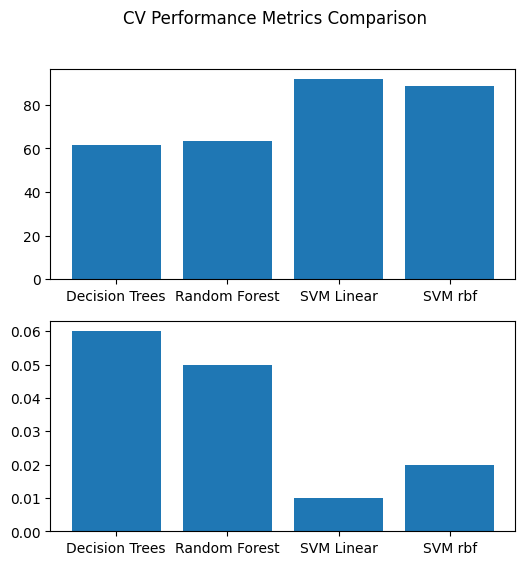

In [ ]:
# Creating subplots with 2 rows and 1 column
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6))

# Adding a title to the entire figure
fig.suptitle('CV Performance Metrics Comparison')

# Plotting the mean cross-validated F1 scores on the first subplot
ax1.bar(perf['algorithm_name'], perf['cv_score_f1'])

# Plotting the standard deviations of cross-validated F1 scores on the second subplot
ax2.bar(perf['algorithm_name'], perf['cv_std_f1'])


**Comparison of Model Performance:**

- The comparison of model performance reveals notable differences among various algorithms.
- Models such as Support Vector Machines (SVM) with linear and Radial Basis Function (RBF) kernels exhibit high accuracy, surpassing 80%.
- Conversely, decision trees and random forest models struggle to achieve comparable accuracy levels, typically hovering around 60%.

**Analysis of Standard Deviation:**

- The examination of standard deviation offers insights into the consistency of model performance.
- SVM models with linear and RBF kernels demonstrate low standard deviation, indicating consistent performance across cross-validation folds.
- Conversely, decision trees and random forest models display higher standard deviation, suggesting greater variability in predictive accuracy.

**Now, one question arises here that why Random Forest is not giving good results but SVM is giving?**

**Analysis of Random Forest Performance:**

- Random Forest struggled due to its variable selection process, particularly when dealing with sparse data.
- In sparse data scenarios, where many features have zero values, the likelihood of selecting features with meaningful information decreases.
- Random Forest's democratic approach to feature selection can penalize itself in sparse data situations, leading to suboptimal performance.

**Challenges with Decision Trees:**

- Decision trees exhibit a propensity for greediness, often growing excessively and incorporating features with limited predictive power.
- This greediness contributes to significant variability in performance, especially evident in scenarios with sparse data.

**Advantages of Support Vector Machines (SVM):**

- SVMs excel in scenarios with sparse data due to their ability to identify support vectors, which play a crucial role in determining classification boundaries.
- In multi-dimensional spaces where linear separation is challenging, SVMs leverage vector dot products effectively, prioritizing informative features while disregarding irrelevant ones.
-SVMs demonstrate superior performance even with a linear kernel in sparse data scenarios, making them an ideal choice for such datasets.

- For sparse data, SVMs are recommended as they are well-suited to handle such scenarios.
- While other algorithms like boosting can also perform well with extensive feature engineering, SVMs offer computational efficiency and robust performance with minimal effort.
- SVMs are hailed as a super technique for handling sparse data due to their inherent advantages and effectiveness in classification tasks.

In [ ]:
# Initializing a Support Vector Classifier with a linear kernel
svc = svm.SVC(kernel='linear')

# Fitting the classifier to the training data
svc.fit(X_train, y_train)

# Predicting the labels for the test data
y_predict = svc.predict(X_test)


In [ ]:
# Calculating the F1 score between the true labels (y_test) and the predicted labels (y_predict)
f1_score = metrics.f1_score(y_test, y_predict)


In [ ]:
# Importing necessary functions for generating a classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Printing the classification report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1202
           1       0.99      0.82      0.90       191

    accuracy                           0.97      1393
   macro avg       0.98      0.91      0.94      1393
weighted avg       0.98      0.97      0.97      1393



In [ ]:
# Generating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_predict)

# Printing the confusion matrix
print(conf_matrix)

[[1201    1]
 [  34  157]]


**Performance Evaluation of SVM Model:**

- The confusion matrix and classification report unveiled the exceptional performance of our Support Vector Machine (SVM) model.
- It is evident that our model has achieved remarkable results, as indicated by high precision, recall, and F1 score.